# 1. Introduction
In this work we introduce a method for quantifying proximity from the defender and the offensive players. We define our method starting from the physical concept of "phase-space": the idea of plotting the velocity of an object vs its position. On a football field we are interested in the $x$ and $y$ coordinates of a player, and the respective velocities $v_x$ and $v_y$. Our phase-space is hence four-dimensional and a point of the phase space will be the four-dimensional vector $$ \left(\begin{array}{c} x\\ v_x \\ y \\ v_y \end{array} \right).$$
In any fixed instant in time for each player on the field we can assign such a four-dimensional vector. An example is shown in the figure below: we have three players 1,2,3 with different positions (the dots) and velocities (the arrows) on the field. We "translated" the dots and arrows to the four-dimensional vectors in the phase space.
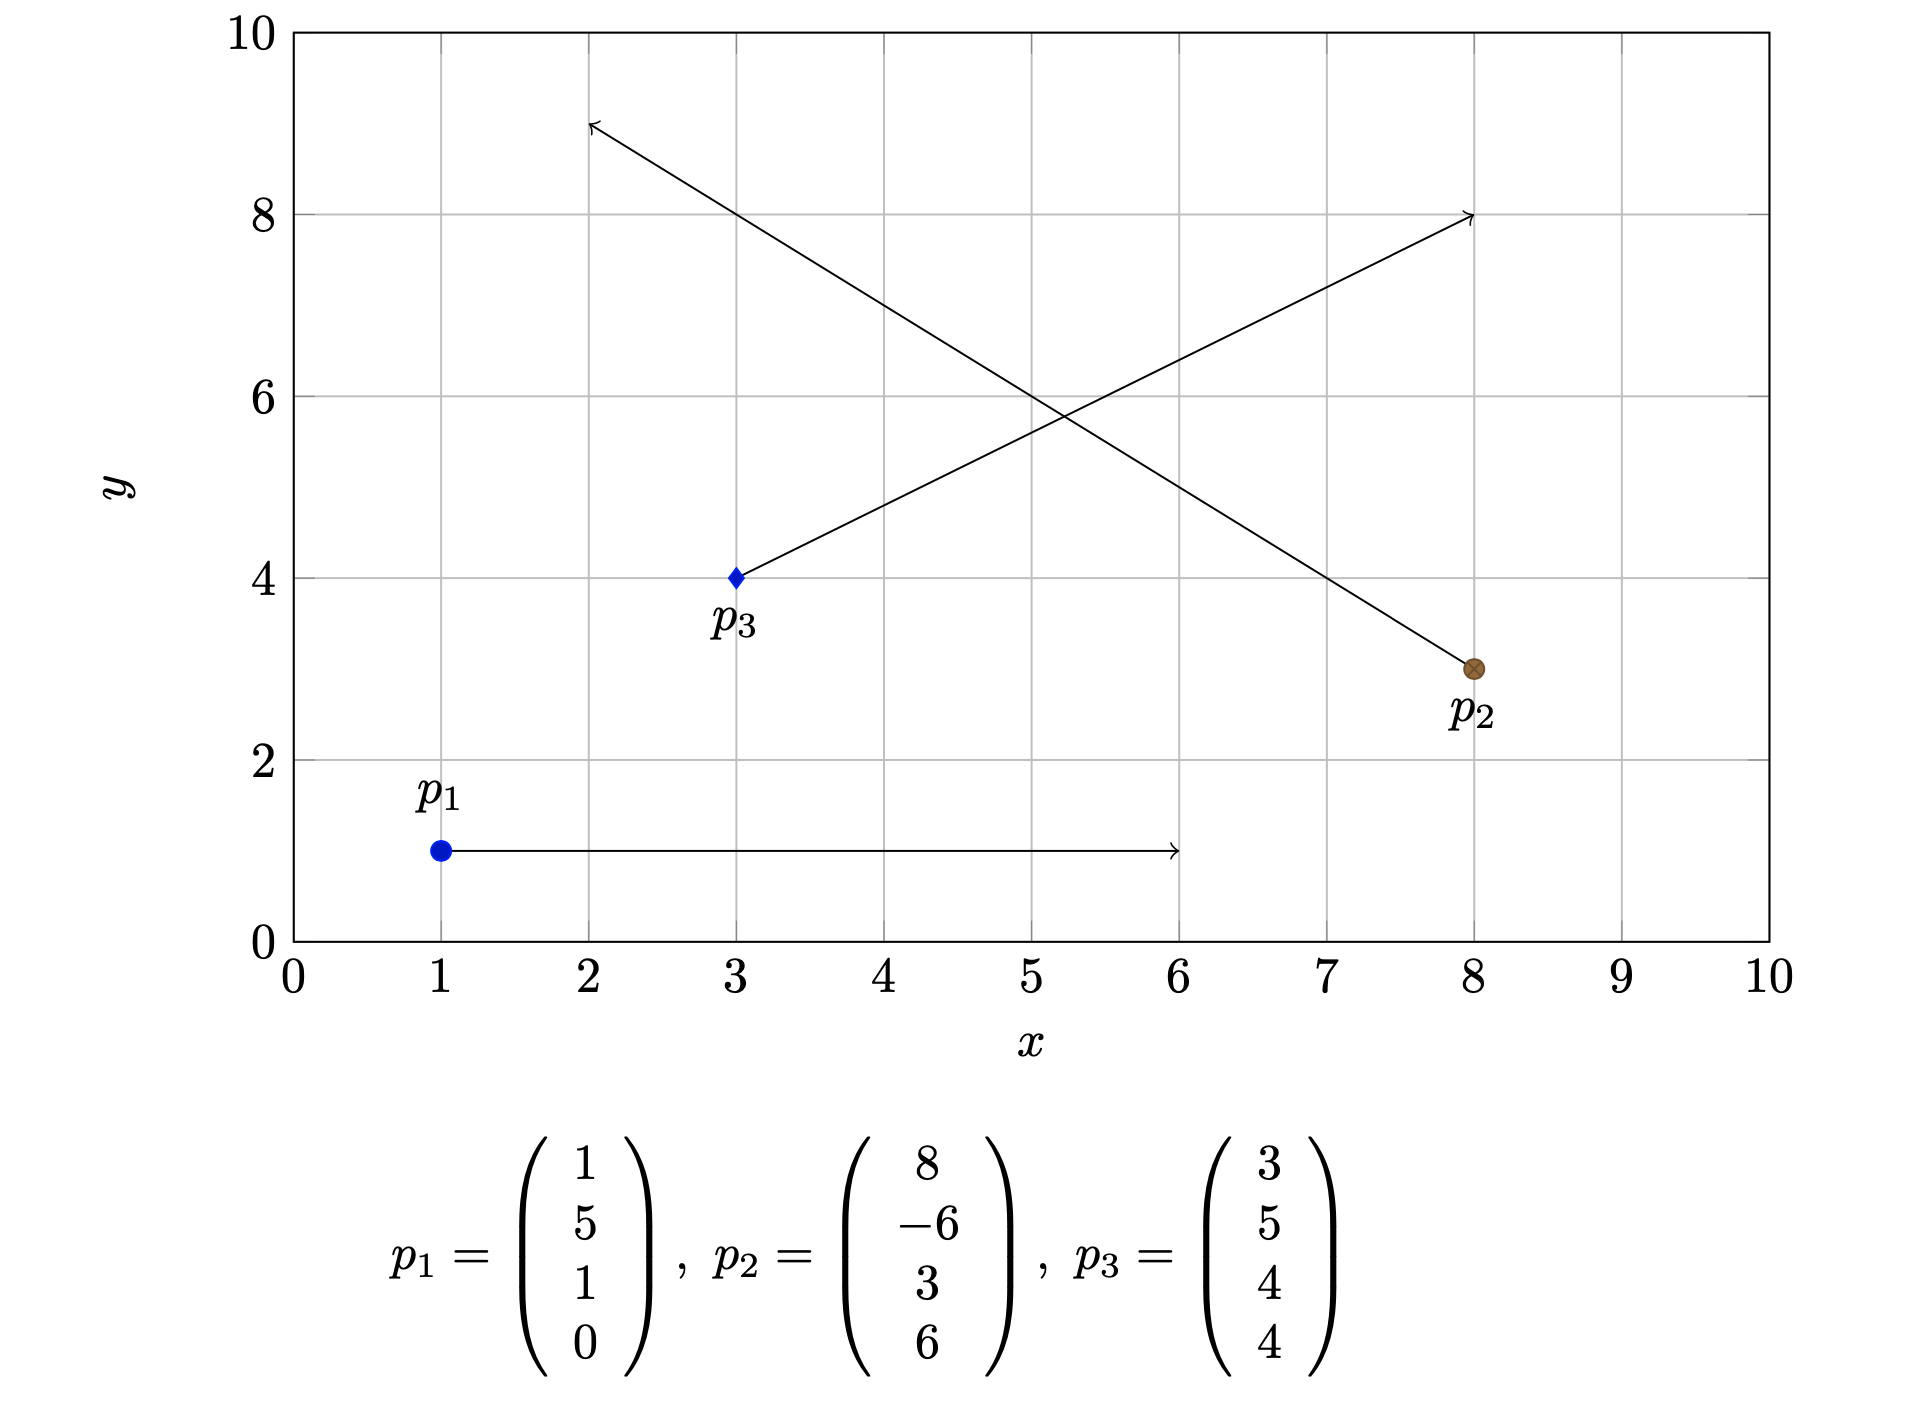

We define the distance between two points $p_1 = (x_1, {v_x}_1, y_1, {v_y}_1)$, $p_2 = (x_2, {v_x}_2, y_2, {v_y}_2)$ to be $$ d_{p_1, p_2} := \left|\left|p_1-p_2\right|\right| = \sqrt{(x_1-x_2)^2+(v_{x_1}-v_{x_2})^2+(y_1-y_2)^2+(v_{y_1}-v_{y_2})^2}.$$
Thanks to the nextgen stats we can calculate at each frame the value of $d_{p_1, p_2}$ between each couple of players on opposing teams.
For a given time interval (e.g. the time between the snap and the throw) *we define the best defender to a given reciever to be the player on the opposing team such that has the minimal value of $d_{p_1, p_2}$*.

The goal of this submission is to show that the analyis of the values of $d_{p_1, p_2}$ is a reasonable choice as it would be in agreement with others indicators such as the percentage of allowed catches: we show that the defenders with the lowest percentage of allowed catches are also the players that have the lowest values of $d_{p_1, p_2}$.
Afterwards we use the data of $d_{p_1, p_2}$ to train a neural network to recognize different types of coverages used by the defending teams.

# 2. General setup and comparison with the percentage of allowed catches

## 2.1) General setup
We divided each action in different moments: the time before the snap, the time between the sanp and the throw, the time between the throw and when the ball arrives/is caught, and what happens next. We will focus our analysis on the second and the third: the interval snap-throw and the interval throw-catch.
For each of those two intervals we calculate at each frame the value of $d_{p_1, p_2}$ for $p_1$ and $p_2$ players of opposing teams. We then take the mean value of $d_{p_1, p_2}$ for all the time frames. If $p_\text{target}$ is a possible target (i.e. a player on the team that has possesion and the player's role is either WR, TE or RB) and $\{p_{\text{def},1}, p_{\text{def},2},\cdots,p_{\text{def},11}\}$ is the list of all 11 defenders, we define the best defender on $p_\text{target}$ to be $$ \text{Best defender}(p_\text{target}) := \min_{j\in \{1,\cdots,11\}}\left(\overline{d_{p_\text{target}, p_{\text{def},j}}}\right) $$
We find the best defender on each possible target for the two time interval (snap-throw and throw-catch).

## 2.2) Comparison with the percentage of allowed catches
The percentage of allowed catches is the number of times a player covered by a certain defender has caught a pass, divided by the total number of pass attempts towards players covered by this same defender. From the data we could determine which player was the target of the pass, and the corresponding defender was given to us by $\text{Best defender}(p_\text{target})$. We only took into account defenders that were involved in such an attempt at least 32 times during a regular season. The first plot below report this: the percentage of allowed catches plotted versus the total number of time that the defender was "targeted". We assigned a color code to the dots, each corresponding to a player: the green dots are the top 10% defenders with the lowest percentage of allowed catches, blue for the rest of the best 30% and orange for all others.

We plotted the values of $\text{Best defender}(p_\text{target})$ fot the time interval between the snap and the throw, and for the interval between the throw and the catch as well. Both these plots are shown below. As we can see there the predictions from $\text{Best defender}(p_\text{target})$ are in good agreement with the percentage of allowed cathces. In the fourth and last plot we plotted the mean value of the $\text{Best defender}(p_\text{target})$ for the two time intervals on the two axes. We can see there that all the non orange dots are in the region of the plot with the lowest values for the two $\text{Best defender}(p_\text{target})$. 

We can therefore say that our definition of $\text{Best defender}(p_\text{target})$ is a reasonable one. In the table below we reported the names of the top defenders in both time intervals. 

![](http://)




In [ ]:
import os
from IPython.display import Image
Image(filename="../input/bestdefendersseparated/allowed_catches.png")#, width=1000, height=100)

### Best defenders from snap to throw

In [ ]:
import pandas as pd
from IPython.display import display, HTML
df = pd.read_csv('../input/bestdefendersseparated/out_st.csv')
display(df)

### Best defenders from throw to catch

In [ ]:
df = pd.read_csv('../input/bestdefendersseparated/out_tc.csv')
display(df)

# 3. Determining defensive schemes
We now use the informations from the values of $\text{Best defender}(p_\text{target})$ to try and create a neural network that can identify the defensive schemes.
We provided to the neural network some general information about the defensive and offensive personnell (number of TE, WE and RB for the offense, number of DB for defense; the fine-tuning of parameters showed that the model was preciser when dropping LB and DL). For each defender that was involved in a play, we provided four additional data: the mean value of $\text{Best defender}(p_\text{target})$ and its standard deviation, for both the two usual time intervals. 
The training data was the whole week 1 data coverages thet were provided in a notebook by another user. We had 8 different schemes: Cover 0 Man, Cover 1 Man, Cover 2 Man, Cover 2 Zone, Cover 3 Zone, Cover 4 Zone, Cover 6 Zone and Prevent Zone.
As we can see in the table below, this dataset was very unbalanced: some schemes are called much more often than others.

In [ ]:
df = pd.read_csv('../input/nfl-big-data-bowl-2021-bonus/coverages_week1.csv')
df_bis = pd.DataFrame()
df_bis['Coverage'] = df['coverage'].value_counts()
display(df_bis)

We hence decided to only split the possible coverages in four categories: the most used man coverage (Cover 1 Man), the most used zone coverage (Cover 3 Zone), all other man coverages and all others zone coverages.

As a first step we only separated between man and zone schemes and afterwards we used our model for the four different categories.

With these data and model we were able to reach an accuracy of 85% for the prediction on man vs. zone schemes and slightly above 70% for the four categories.

This good result in determining schemes also shows that the metric we choose was a good one.

As a last result we present the percentage of allowed catches and of allowed yards each week for the four categories.

In [ ]:
Image(filename="../input/bestdefendersseparated/zones.png")

From the plots we can see that the Man schemes tend to have a lower percentage of allowed catches and (generally) also lead to a lower yardage gain.